In [2]:
# Import needed modules and files
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
filepath = os.path.join('Analytics Exercise Dataset - Thumbtack.csv')
df = pd.read_csv(filepath)

In [3]:
df.head()

,Week,Category,Customers,Contacts,Accepted Contacts,Revenue
0,1,Bathroom Remodel,542,1666,748,41973
1,1,Concrete Installation,1266,3769,1358,53066
2,1,DJ,1575,3877,2265,47437
3,1,Electrical and Wiring Repair,1360,4725,2452,38401
4,1,Exterior Painting,803,2797,1267,56759


In [4]:
# Check total list of categories, length of time frame
categories = df["Category"].unique()
print(len(categories))
print(len(df["Week"].unique()))
df.shape

20
13


(260, 6)

In [5]:
# Which categories made most revenue overall?
m1 = pd.DataFrame(df.groupby(['Category'])['Revenue'].sum())
m1 = m1.rename(columns={"Revenue": "Total Revenue"})
m1 = m1.sort_values(by=['Total Revenue'], ascending=False)

# Take a look at categories from highest revenue to lowest
m1.head(20)

,Total Revenue
Category,
House Cleaning,2182248
Interior Painting,1441540
Local Moving (under 50 miles),1165476
Roof Installation or Replacement,1040697
Outdoor Landscaping and Design,1010423
Handyman,822910
General Contracting,762840
Wedding and Event Photography,762642
Floor Installation or Replacement,673094


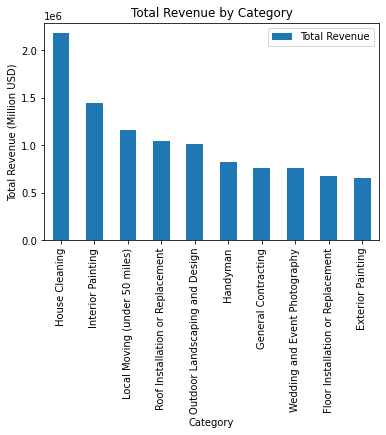

In [6]:
# Same data as above (looking at top 10 categories)

m1.head(10).plot(kind='bar', title='Total Revenue by Category', ylabel='Total Revenue (Million USD)')
plt.show()

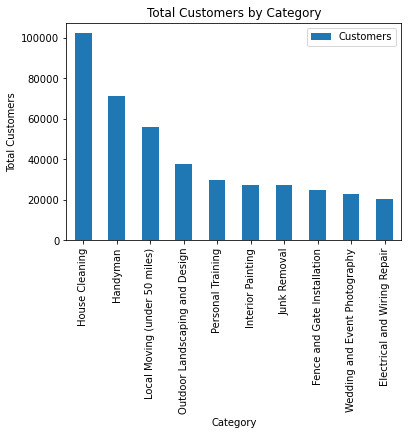

In [7]:
# Total customers for top 10 revenue categories
m1 = pd.DataFrame(df.groupby(['Category'])['Customers'].sum())
m1 = m1.sort_values(by=['Customers'], ascending=False)
m1.head(10).plot(kind='bar', title='Total Customers by Category', ylabel='Total Customers')
plt.show()

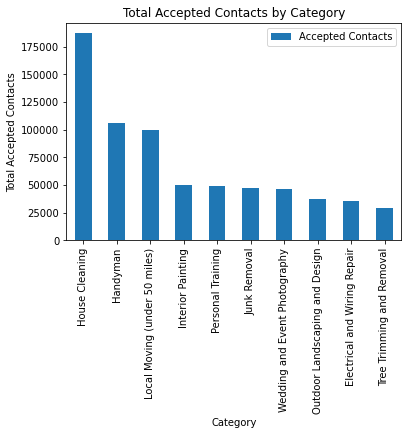

In [8]:
# Total accepted contacts for top 10 revenue categories
m1 = pd.DataFrame(df.groupby(['Category'])['Accepted Contacts'].sum())
m1 = m1.sort_values(by=['Accepted Contacts'], ascending=False)
m1.head(10).plot(kind='bar', title='Total Accepted Contacts by Category', ylabel='Total Accepted Contacts')
plt.show()

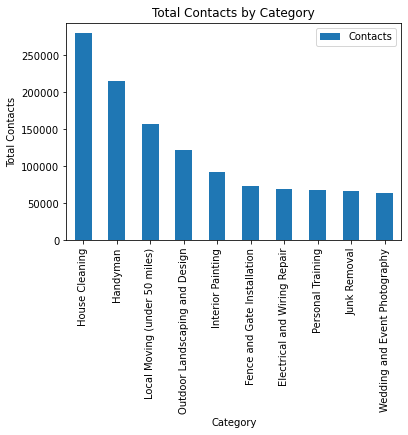

In [9]:
# Total contacts for top 10 revenue categories
m1 = pd.DataFrame(df.groupby(['Category'])['Contacts'].sum())
m1 = m1.sort_values(by=['Contacts'], ascending=False)
m1.head(10).plot(kind='bar', title='Total Contacts by Category', ylabel='Total Contacts')
plt.show()

C:\Users\cdonnelly.EFCLOCAL\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


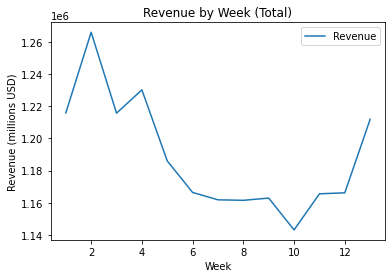

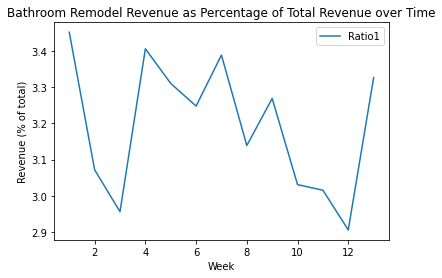

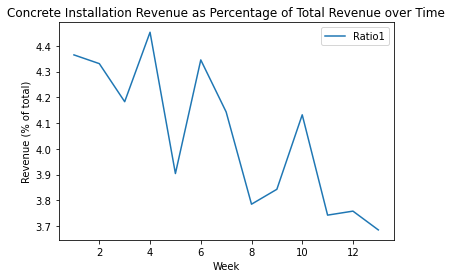

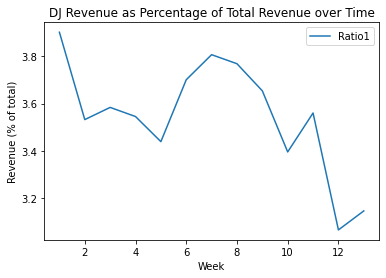

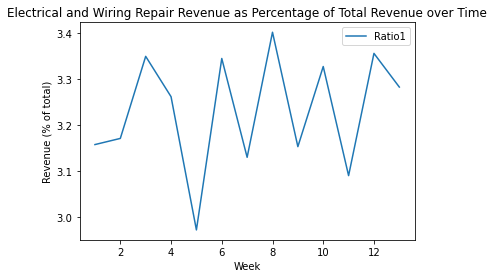

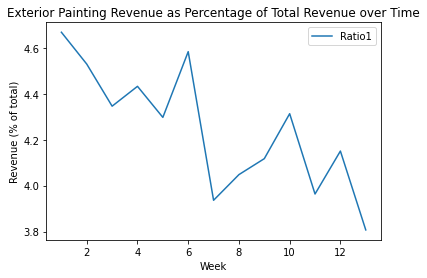

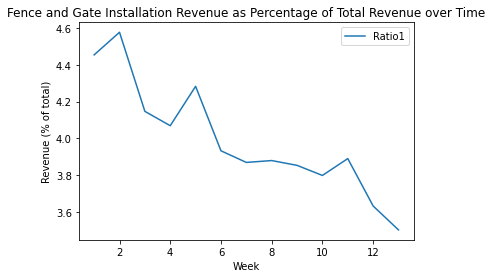

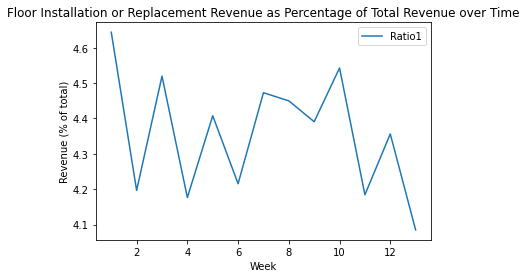

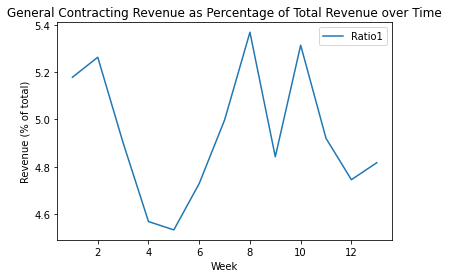

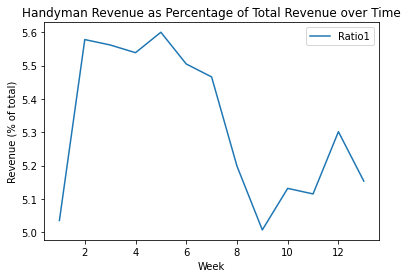

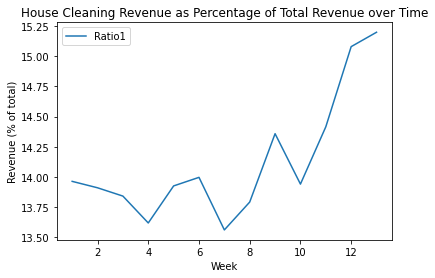

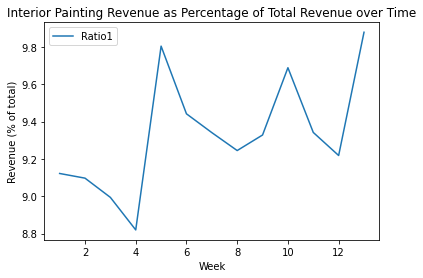

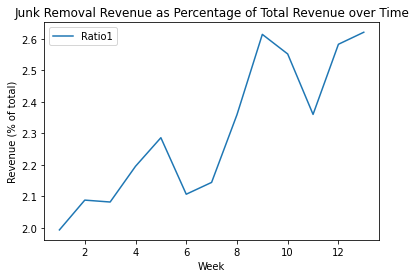

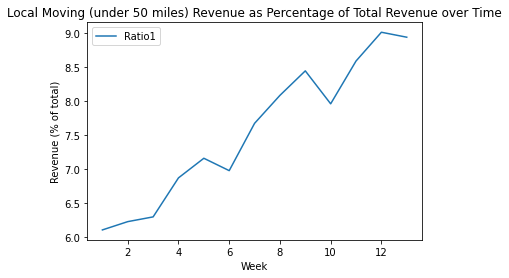

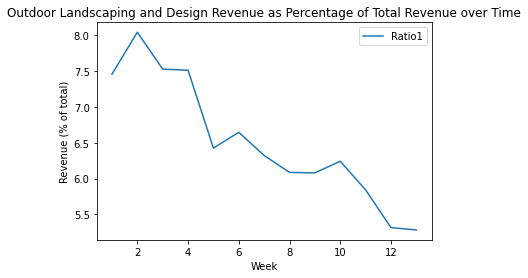

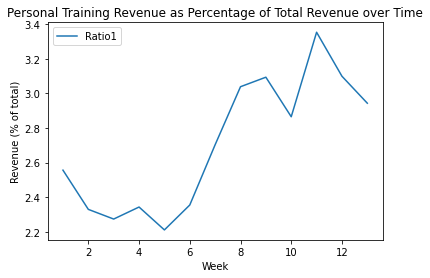

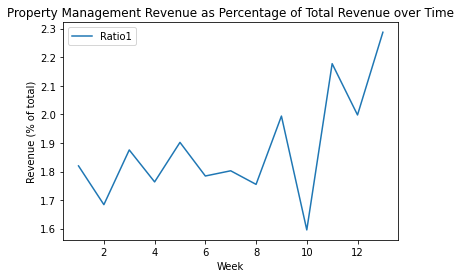

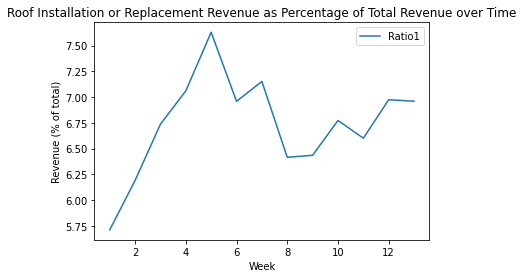

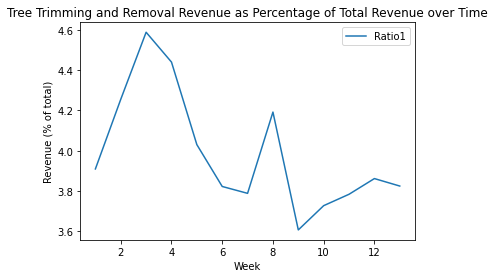

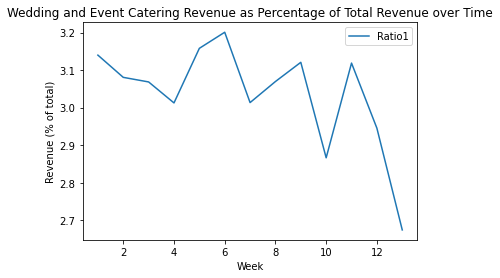

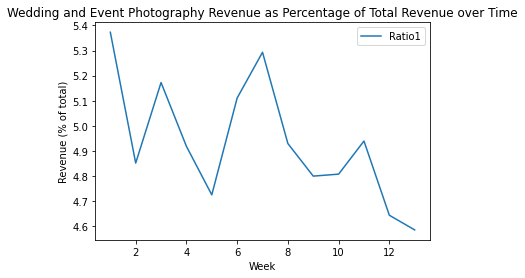

In [10]:
# Total revenue over time
m8 = pd.DataFrame(df.groupby(['Week'], as_index=False)['Revenue'].sum())
m8.plot(title="Revenue by Week (Total)", y='Revenue', x='Week', ylabel='Revenue (millions USD)')
m8
# Contribution of different categories to total revenue over time
for cat in list(df['Category'].unique()):
    df2 = df.loc[df['Category'] == cat]
    df2 = pd.merge(df2, m8, on='Week', how='left')
   
    df2['Ratio1'] = 100 * df2['Revenue_x'] / df2['Revenue_y']
    df2.plot(title=f'{cat} Revenue as Percentage of Total Revenue over Time', y='Ratio1', x='Week', ylabel='Revenue (% of total)')

<AxesSubplot:title={'center':'Revenue by Week (Top 3 Earners)'}, xlabel='Week', ylabel='Weekly Revenue'>

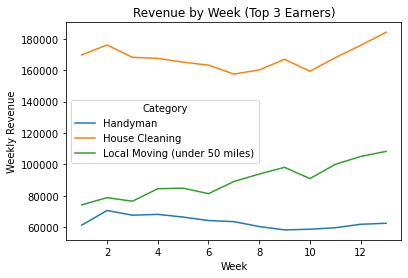

In [11]:
# Take a look at top 3 over time
top3 = m1.head(3).squeeze().to_dict()
plt1 = pd.DataFrame()
for key in top3:
    plt1 = plt1.append( df.loc[df['Category'] == key])
df1 = plt1.pivot(index='Week', columns='Category', values='Revenue')
df1.plot(ylabel = "Weekly Revenue", title="Revenue by Week (Top 3 Earners)")

<AxesSubplot:title={'center':'Revenue by Week (Bottom 3 Earners)'}, xlabel='Week', ylabel='Weekly Revenue'>

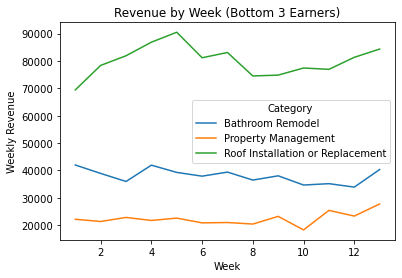

In [12]:
# Take a look at bottom 3 over time
bot3 = m1.tail(3).squeeze().to_dict()
plt1 = pd.DataFrame()
for key in bot3:
    plt1 = plt1.append( df.loc[df['Category'] == key])

df1 = plt1.pivot(index='Week', columns='Category', values='Revenue')
df1.plot(ylabel = "Weekly Revenue", title="Revenue by Week (Bottom 3 Earners)")
                          

Line equation is y = -5.38x + 1416835.79
r-squared value = 0.11424122782666969


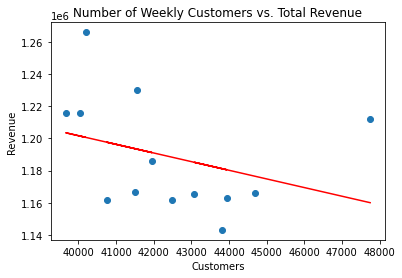

Line equation is y = -1.63x + 1390911.9
r-squared value = 0.17572540242942883


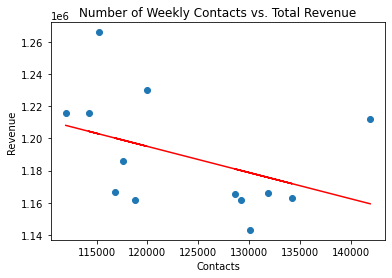

Line equation is y = -2.63x + 1363241.25
r-squared value = 0.12991895898729805


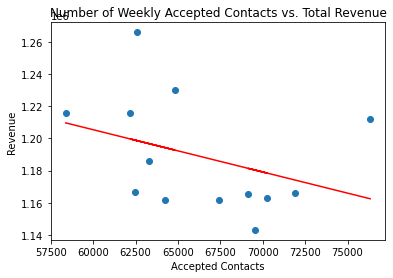

In [13]:
# total weekly customers/contacts vs total weekly revenue
for el in ['Customers', 'Contacts', 'Accepted Contacts']:
    m = df.groupby('Week', as_index=False)[f'{el}'].sum()
    n = df.groupby('Week', as_index=False)['Revenue'].sum()
    x_values= m[f'{el}']
    y_values = n['Revenue']
    plt.scatter(x_values, y_values)
    plt.title(f'Number of Weekly {el} vs. Total Revenue')
    plt.xlabel(f'{el}')
    plt.ylabel('Revenue')

    # Linear regression model

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    print("Line equation is " + line_eq)
    print(f"r-squared value = {rvalue**2}")
    
    plt.show()

     Customers  Revenue
0          299    20384
1          322    20942
2          325    18239
3          338    22801
4          345    23188
..         ...      ...
246       7781   159349
247       7813   165155
248       8341   166974
249       8690   175866
250       9688   184214

[251 rows x 2 columns]
Line equation is y = 13.08x + 33399.66
r-squared value = 0.48883355063989925


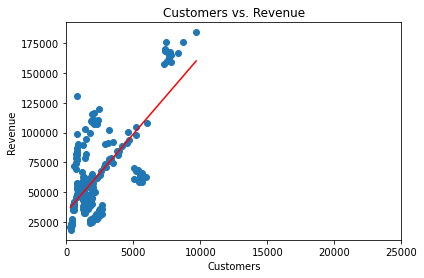

     Contacts  Revenue
0         871    18239
1         904    20384
2         905    20812
3         925    20942
4         952    22801
..        ...      ...
249     21428   168021
250     21833   160187
251     23575   175866
252     24108   166974
253     27026   184214

[254 rows x 2 columns]
Line equation is y = 4.78x + 30874.47
r-squared value = 0.4877057164030469


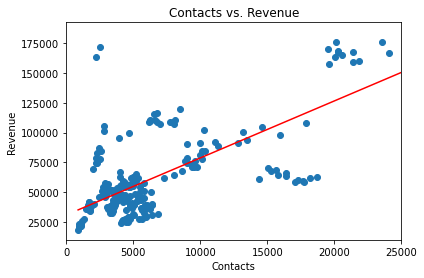

     Accepted Contacts  Revenue
0                  477    39051
1                  480    20384
2                  503    21321
3                  506    20942
4                  511    22124
..                 ...      ...
242              14757   159349
243              14928   168021
244              15921   166974
245              16542   175866
246              18619   184214

[247 rows x 2 columns]
Line equation is y = 7.32x + 37503.21
r-squared value = 0.47387570204776286


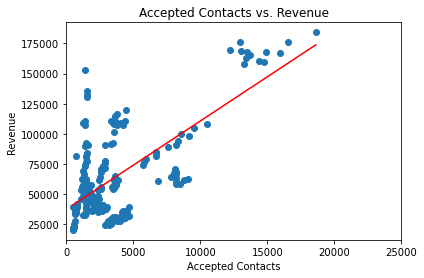

In [23]:
# Look for correlation between revenue and various factors,
# BROKEN DOWN BY CATEGORY
for el in ['Customers', 'Contacts', 'Accepted Contacts']:
    m = df.groupby(el, as_index=False)['Revenue'].sum()

    x_values= m[el]
    y_values = m['Revenue']
    print(m)
    plt.scatter(x_values, y_values)
    plt.title(f'{el} vs. Revenue')
    plt.xlabel(f'{el}')
    plt.ylabel('Revenue')

    # Linear regression model

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    print("Line equation is " + line_eq)
    print(f"r-squared value = {rvalue**2}")

    plt.xlim([0, 25000])
    plt.show()


<AxesSubplot:title={'center':'Number of Customers by Week'}, xlabel='Week', ylabel='Customers'>

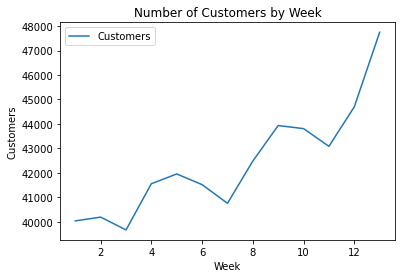

In [15]:
# Does number of customers vary with time?

d = pd.DataFrame(df.groupby(['Week'])['Customers'].sum())

d.plot(y='Customers',ylabel = "Customers", title="Number of Customers by Week")

<AxesSubplot:title={'center':'Number of Contacts by Week'}, xlabel='Week', ylabel='Contacts'>

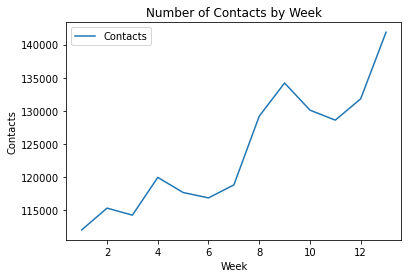

In [16]:
# Does number of contacts increase/decrease with customer numbers?

d = pd.DataFrame(df.groupby(['Week'])['Contacts'].sum())
# do group by week, ratio.mean
d.plot( y='Contacts',ylabel = "Contacts", title="Number of Contacts by Week")

<AxesSubplot:title={'center':'Weekly Contacts per Customer'}, xlabel='Week', ylabel='Contacts per Customer'>

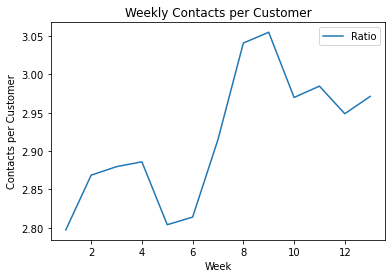

In [17]:
# Can be a measure of customer willingness
# dont want mean of ratio (above either), want sum of each grouped by week and divide those
m9 = pd.DataFrame(df.groupby(['Week'], as_index=False)['Customers'].sum())
m10 = pd.DataFrame(df.groupby(['Week'], as_index=False)['Contacts'].sum())
m9 = pd.merge(m9, m10, on='Week', how='left')
m9['Ratio'] = m9['Contacts'] / m9['Customers']
m9.plot(y='Ratio',ylabel = "Contacts per Customer", title="Weekly Contacts per Customer", x='Week')

<AxesSubplot:title={'center':'Weekly Contacts per 1 Accepted Contact'}, xlabel='Week', ylabel='Contacts per Accepted Contact'>

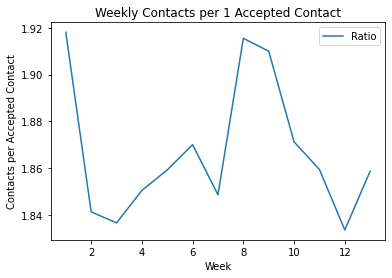

In [18]:
# Can be a measure of seller willingness
m9 = pd.DataFrame(df.groupby(['Week'], as_index=False)['Accepted Contacts'].sum())
m10 = pd.DataFrame(df.groupby(['Week'], as_index=False)['Contacts'].sum())
m9 = pd.merge(m9, m10, on='Week', how='left')
m9['Ratio'] = m9['Contacts'] / m9['Accepted Contacts']
m9.plot(y='Ratio',ylabel = "Contacts per Accepted Contact", title="Weekly Contacts per 1 Accepted Contact", x='Week')

<AxesSubplot:title={'center':'Accepted Contacts per Customer - House Cleaning'}, xlabel='Week', ylabel='Accepted Contacts per Customer'>

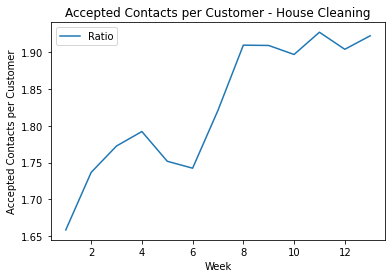

In [19]:
# Weekly accepted contacts per customer
df5 = df.loc[df['Category'] == 'House Cleaning']
m9 = pd.DataFrame(df5.groupby(['Week'], as_index=False)['Accepted Contacts'].sum())
m10 = pd.DataFrame(df5.groupby(['Week'], as_index=False)['Customers'].sum())
m9 = pd.merge(m9, m10, on='Week', how='left')
m9['Ratio'] = m9['Accepted Contacts'] / m9['Customers']
m9.plot(y='Ratio',ylabel = "Accepted Contacts per Customer", title="Accepted Contacts per Customer - House Cleaning", x='Week')

In [20]:
# Which category is responsible for dip in revenue between weeks 4-10?
tot10 = (df.loc[df['Week'] == 10]['Revenue']).sum()
tot4 = (df.loc[df['Week'] == 4]['Revenue']).sum()
deltas = {'Category': ['TOTAL'], 'Delta': [tot10-tot4]}
for cat in list(df['Category'].unique()):
    deltas['Category'].append(cat)
    i = ((df.loc[df['Category'] == cat]).loc[df['Week'] == 10])['Revenue']
    j = ((df.loc[df['Category'] == cat]).loc[df['Week'] == 4])['Revenue']
    deltas['Delta'].append(int(i) - int(j))
    #print('Week 4 to Week 10 Revenue Delta: ' + str(int(i)-int(j)))
pd.DataFrame(deltas).sort_values(by='Delta', ascending=True)


,Category,Delta
0,TOTAL,-87168
14,Outdoor Landscaping and Design,-21052
18,Tree Trimming and Removal,-12017
9,Handyman,-9478
17,Roof Installation or Replacement,-9440
10,House Cleaning,-8185
2,Concrete Installation,-7541
1,Bathroom Remodel,-7261
6,Fence and Gate Installation,-6637
20,Wedding and Event Photography,-5553


In [21]:
cat = 'Outdoor Landscaping and Design'
i = ((df.loc[df['Category'] == cat]).loc[df['Week'] == 10])['Customers']
j = ((df.loc[df['Category'] == cat]).loc[df['Week'] == 4])['Customers']
print((int(i) - int(j)))
print(abs((int(i) - int(j)))/int(j))

i = ((df.loc[df['Category'] == cat]).loc[df['Week'] == 10])['Contacts']
j = ((df.loc[df['Category'] == cat]).loc[df['Week'] == 4])['Contacts']
print((int(i) - int(j)))
print(abs((int(i) - int(j)))/int(j))
i = ((df.loc[df['Category'] == cat]).loc[df['Week'] == 10])['Accepted Contacts']
j = ((df.loc[df['Category'] == cat]).loc[df['Week'] == 4])['Accepted Contacts']
print((int(i) - int(j)))
print(abs((int(i) - int(j)))/int(j))

-585
0.16966357308584687
-1564
0.14068543671853917
-631
0.1806987399770905


In [22]:
el = 'Customers'
df.groupby(el, as_index=False)['Revenue'].sum()

# x_values= m[el]
# y_values = m['Revenue']

,Customers,Revenue
0,299,20384
1,322,20942
2,325,18239
3,338,22801
4,345,23188
...,...,...
246,7781,159349
247,7813,165155
248,8341,166974
249,8690,175866
